In [67]:
%cd ..
import pandas as pd

df = pd.read_csv('handheld_male_rect.csv', header=[0,1], index_col=[0]).reset_index(drop=True)
%cd PDR
df

c:\Users\arada\Documents\Projects\Uni\final project\MARG Dead-reckoning
c:\Users\arada\Documents\Projects\Uni\final project\MARG Dead-reckoning\PDR


accel                          gyro                            mag  \
             x         y         z         x         y         z          x   
0     1.201908  3.964859 -9.236971  0.033864 -0.014928  0.023921  54.078620   
1     1.201908  3.964859 -9.236971  0.033864 -0.014928  0.023921  54.078620   
2     1.201908  3.964859 -9.236971  0.033864 -0.014928  0.023921  54.078620   
3     1.201908  3.964859 -9.236971  0.033864 -0.014928  0.023921  54.078620   
4     1.201908  3.964859 -9.236971  0.033864 -0.014928  0.023921  54.078620   
...        ...       ...       ...       ...       ...       ...        ...   
8707  1.494005  4.395822 -9.007124 -0.037510 -0.010667  0.010072  64.637312   
8708  1.494005  4.395822 -9.007124 -0.037510 -0.010667  0.010072  64.637312   
8709  1.494005  4.395822 -9.007124 -0.037510 -0.010667  0.010072  64.637312   
8710  1.494005  4.395822 -9.007124 -0.037510 -0.010667  0.010072  64.637312   
8711  1.494005  4.395822 -9.007124 -0.037510 -0.010667  0.010072  64.637312   

                                     Q                                
               y           z         w         x         y         z  
0     101.162066 -123.188338  0.157280  0.886197  0.412394  0.140886  
1     101.162066 -123.188338  0.157280  0.886197  0.412394  0.140886  
2     101.162066 -123.188338  0.157280  0.886197  0.412394  0.140886  
3     101.162066 -123.188338  0.157280  0.886197  0.412394  0.140886  
4     101.162066 -123.188338  0.157280  0.886197  0.412394  0.140886  
...          ...         ...       ...       ...       ...       ...  
8707  127.866290 -110.300338  0.204356  0.899807  0.358734  0.141054  
8708  127.866290 -110.300338  0.204356  0.899807  0.358734  0.141054  
8709  127.866290 -110.300338  0.204356  0.899807  0.358734  0.141054  
8710  127.866290 -110.300338  0.204356  0.899807  0.358734  0.141054  
8711  127.866290 -110.300338  0.204356  0.899807  0.358734  0.141054  

[8712 rows x 13 columns]

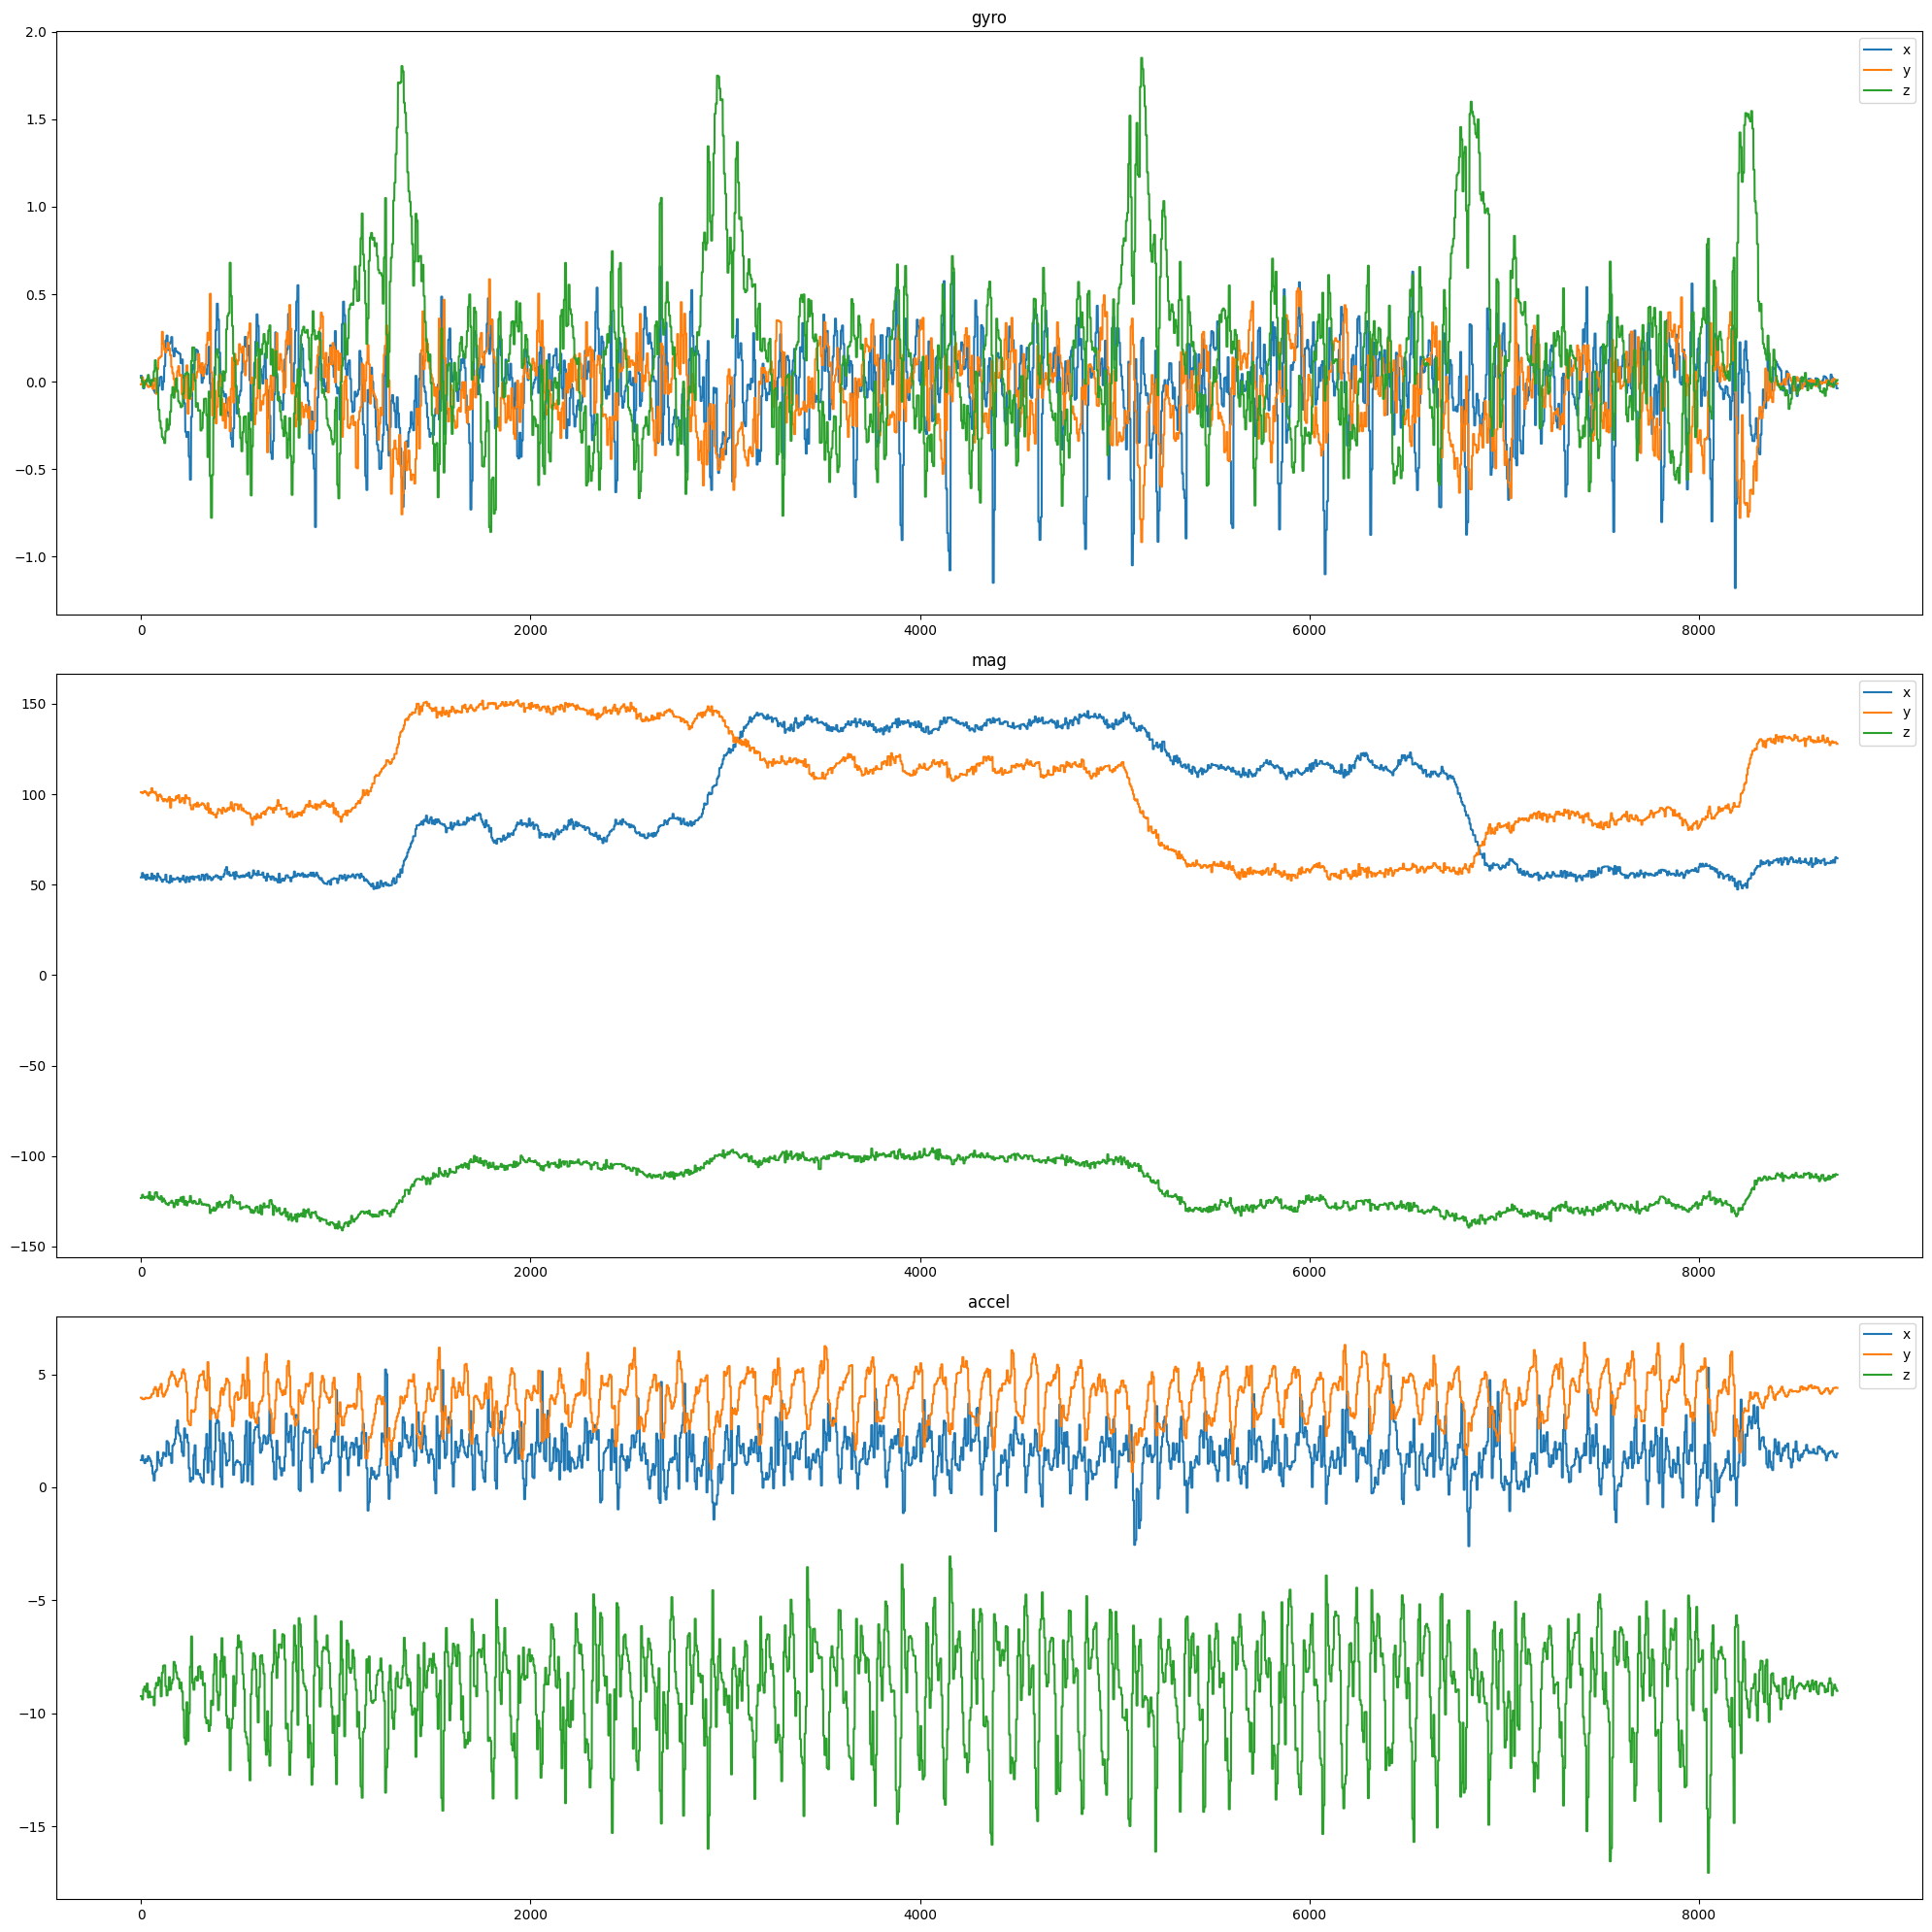

In [68]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(3, 1, figsize=(20, 20), tight_layout=True)

# set matpltoblb style to light mode
plt.style.use('default')

ax[0].plot(df['gyro'])
ax[0].set_title('gyro')
ax[0].legend(['x', 'y', 'z'])

ax[1].plot(df['mag'])
ax[1].set_title('mag')
ax[1].legend(['x', 'y', 'z'])

ax[2].plot(df['accel'])
ax[2].set_title('accel')
ax[2].legend(['x', 'y', 'z'])


plt.show()

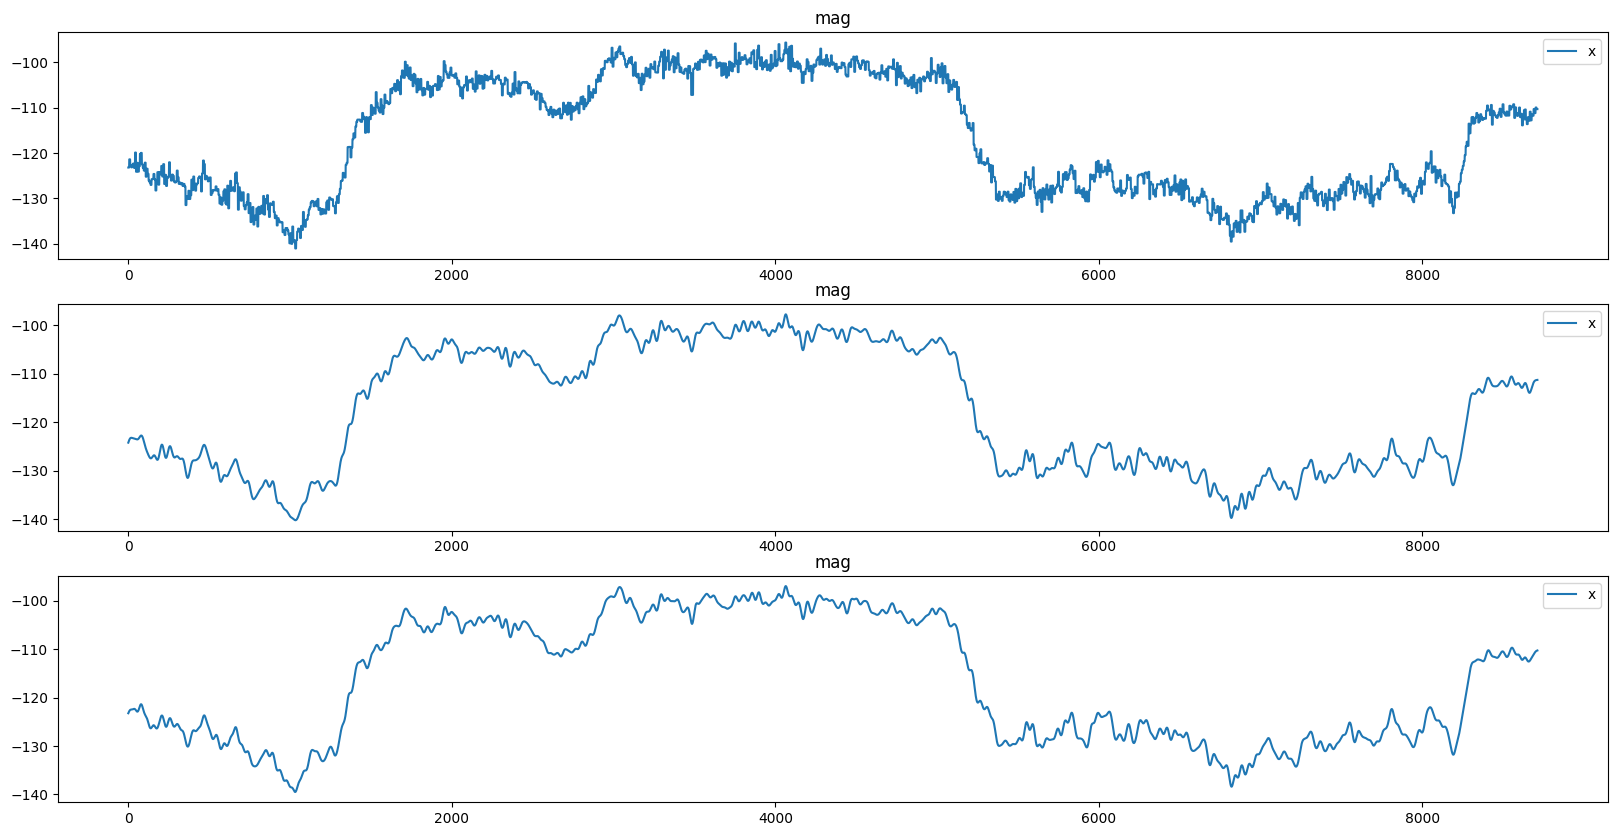

In [69]:
# low pass filter over mag Y axis
from scipy import signal

# increase plot size
_, ax = plt.subplots(3, 1, figsize=(20, 10))
ax[0].plot(df['mag']['z'])
ax[0].set_title('mag')
ax[0].legend(['x'])
b, a = signal.butter(13, 5, fs=200, btype='lowpass', analog=False)
ax[1].plot(signal.filtfilt(b, a, df['mag']['z'].copy()))
ax[1].set_title('mag')
ax[1].legend(['x'])
b, a = signal.butter(5, 5, fs=200, btype='lowpass', analog=False)
ax[2].plot(signal.filtfilt(b, a, df['mag']['z'].copy()))
ax[2].set_title('mag')
ax[2].legend(['x'])
plt.show()

In [70]:

import pandas as pd
import itertools
import quaternion


dt = 1/200
df['Q_f'] = df['Q'].apply(lambda x : quaternion.from_float_array(x.to_numpy()), axis=1)
df['qtrm'] = df['Q_f'].apply(quaternion.as_rotation_matrix)
df = df.apply(lambda x: x['qtrm'].iloc[0] @ x['accel'], axis=1).copy().to_dict()
df = pd.DataFrame(df).T
# df.apply(lambda x: print(x['qtrm'].iloc[0], x['accel']), axis=1)
df.columns = tuple(itertools.product(['accel'], ['x', 'y', 'z']))


sf = df.shift(1).apply(lambda x: x * dt)
sf.columns = (('vel', 'x'), ('vel', 'y'), ('vel', 'z'))
sf = sf.cumsum()
df = pd.concat([df, sf], axis=1)
df.fillna(0, inplace=True)

sf = pd.DataFrame(0, index=df.index, columns=(('pos', 'x'), ('pos', 'y'), ('pos', 'z')))
df = pd.concat([df, sf], axis=1)
df['pos'] = df['vel'].shift(1) * dt + df['accel'].shift(1) * (dt ** 2) / 2
df.fillna(0, inplace=True)
df['pos'] = df['pos'].cumsum()

# sf = pd.DataFrame(0, index=df.index, columns=(('pos_v', 'x'), ('pos_v', 'y'), ('pos_v', 'z')))
# df = pd.concat([df, sf], axis=1)
# df['pos_v'] = df.apply(lambda x: x['accel'] * (x.name ** 2) / 2, axis=1)
df

accel                            vel                         \
             x         y          z         x          y           z   
0    -0.037091  0.013234  10.123476  0.000000   0.000000    0.000000   
1    -0.037091  0.013234  10.123476 -0.000185   0.000066    0.050617   
2    -0.037091  0.013234  10.123476 -0.000371   0.000132    0.101235   
3    -0.037091  0.013234  10.123476 -0.000556   0.000199    0.151852   
4    -0.037091  0.013234  10.123476 -0.000742   0.000265    0.202470   
...        ...       ...        ...       ...        ...         ...   
8707  0.027467  0.554306  10.118082  4.491842  23.070685  430.508853   
8708  0.027467  0.554306  10.118082  4.491980  23.073456  430.559443   
8709  0.027467  0.554306  10.118082  4.492117  23.076228  430.610034   
8710  0.027467  0.554306  10.118082  4.492254  23.078999  430.660624   
8711  0.027467  0.554306  10.118082  4.492392  23.081771  430.711215   

               pos                             
                 x             y            z  
0     0.000000e+00  0.000000e+00     0.000000  
1    -4.636359e-07  1.654224e-07     0.000127  
2    -1.854544e-06  6.616895e-07     0.000506  
3    -4.172723e-06  1.488801e-06     0.001139  
4    -7.418174e-06  2.646758e-06     0.002025  
...            ...           ...          ...  
8707  3.155910e+00  3.470664e+02  9377.893871  
8708  3.178370e+00  3.471817e+02  9380.046541  
8709  3.200830e+00  3.472971e+02  9382.199465  
8710  3.223291e+00  3.474125e+02  9384.352642  
8711  3.245753e+00  3.475279e+02  9386.506071  

[8712 rows x 9 columns]

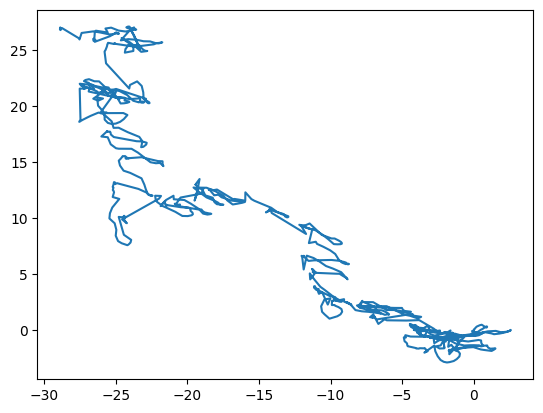

In [61]:
import matplotlib.pyplot as plt
# draw pos for x, y, z in 3d
plt.plot(df['vel']['x'], df['vel']['y'])
plt.show()